#### Import required libraries 

In [76]:
#Liraries for data manipulation
import pandas as pd
import numpy as np

#data visualization library
import matplotlib.pyplot as plt

# Sk;earn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import time
import random

In [78]:
# read the data and display some data
df=pd.read_csv("weatherAUS.csv")
df.head(10) # display first 10 rows of data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/08,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,12/7/08,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,12/8/08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,12/9/08,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,12/10/08,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [79]:
#check the shape
print(f'Number of rows are {df.shape[0]},number of columns are {df.shape[1]}')

Number of rows are 145460,number of columns are 23


In [80]:
# check the data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data preprocessing

 1. Get rid of some columns of which each of them is not considered as a feature.

In [81]:
df=df.drop(['Date','Location'],axis=1)
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Calculate the sum of all null values in the dataset 

In [82]:
# Sum of all rows with missing values
rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Total number of rows with missing values is:", rows_with_missing_values)
print("")
# sum of all missing values in each columns in percentage
for col in df.columns:
    print(f"Sum of missing values in {col} column is : {df[col].isnull().sum()}")

Total number of rows with missing values is: 89040

Sum of missing values in MinTemp column is : 1485
Sum of missing values in MaxTemp column is : 1261
Sum of missing values in Rainfall column is : 3261
Sum of missing values in Evaporation column is : 62790
Sum of missing values in Sunshine column is : 69835
Sum of missing values in WindGustDir column is : 10326
Sum of missing values in WindGustSpeed column is : 10263
Sum of missing values in WindDir9am column is : 10566
Sum of missing values in WindDir3pm column is : 4228
Sum of missing values in WindSpeed9am column is : 1767
Sum of missing values in WindSpeed3pm column is : 3062
Sum of missing values in Humidity9am column is : 2654
Sum of missing values in Humidity3pm column is : 4507
Sum of missing values in Pressure9am column is : 15065
Sum of missing values in Pressure3pm column is : 15028
Sum of missing values in Cloud9am column is : 55888
Sum of missing values in Cloud3pm column is : 59358
Sum of missing values in Temp9am column

 2. Get rid of some data instances (rows) which have missing values


In [83]:
df=df.dropna() # this methos removes all rows with NULL values

In [84]:
df.shape

(56420, 21)

3. Convert attributes of each of the features (columns) into arbitrary positive numbers.
 
   - We have features that are objects and therefore we we use lable encoding 


In [85]:
label_cols=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
le=LabelEncoder()
for col in  label_cols:
    df[col]=le.fit_transform(df[col])

4. Divide the data set into two sets: training set Dtrain (70%) and testing set Dtest (30%)


In [86]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


X_train.shape, X_test.shape
print(f"Training instances: {X_train.shape[0]}, Training features: {X_train.shape[1]}")

print(f"Testing instances: {X_test.shape[0]}, Testing features: {X_test.shape[1]}")

Training instances: 39494, Training features: 20
Testing instances: 16926, Testing features: 20


## MODEL BUILDING

We will create a feed forward neural network with the following:
- Input layer equal to number of features.
- two hidden layers.
- Two or one number of neurons in the output. 

In [87]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(20,),name='Input_layer'), #input later
    keras.layers.Dense(32, activation='relu',name='First_hidden_layer'), #first hidden layer
    keras.layers.Dense(32, activation='relu',name='Second_hidden_layer'), # second hidden layer
    keras.layers.Dense(1, activation='sigmoid',name='Output_layer')]) # Output layer



#### Loss function
- It quantifies error between the predicted y and actual y
- The choice of loss function to use depends on the problem.Since this is a binary classification proble(0 for it will not rain and 1 it will rain) we use binary cross entropy.

#### Optimizer
- It is a function that adjusts the neural network parameters(weights,bias,learning rate),helping in reducing overall loss and improving accuracy.
- We used Adam as the optimizing function for it ability to adaptively adjust learning rate for each network weight individually.

In [88]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


# Define stop criteria
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=5 )

# Train the NN model based on the backpropagation algorithm
start_time=time.time()
history = model.fit(X_train, y_train, epochs=20,validation_split=0.2,callbacks=[early_stop])
end_time=time.time()
print(f'Total elapsed time is {end_time-start_time} seconds')


Epoch 1/20
988/988 [==============================] - 6s 4ms/step - loss: 0.9107 - accuracy: 0.7821 - val_loss: 0.5664 - val_accuracy: 0.8142
Epoch 2/20
988/988 [==============================] - 5s 5ms/step - loss: 0.4771 - accuracy: 0.8134 - val_loss: 0.3647 - val_accuracy: 0.8480
Epoch 3/20
988/988 [==============================] - 6s 6ms/step - loss: 0.4225 - accuracy: 0.8265 - val_loss: 0.3908 - val_accuracy: 0.8405
Epoch 4/20
988/988 [==============================] - 4s 4ms/step - loss: 0.4009 - accuracy: 0.8320 - val_loss: 0.4862 - val_accuracy: 0.7687
Epoch 5/20
988/988 [==============================] - 4s 4ms/step - loss: 0.3966 - accuracy: 0.8326 - val_loss: 0.5243 - val_accuracy: 0.8109
Epoch 6/20
988/988 [==============================] - 4s 4ms/step - loss: 0.3909 - accuracy: 0.8330 - val_loss: 0.3708 - val_accuracy: 0.8439
Epoch 7/20
988/988 [==============================] - 4s 4ms/step - loss: 0.3706 - accuracy: 0.8399 - val_loss: 0.3460 - val_accuracy: 0.8501
Epoch 

#### Notes
- Random seed is not set and therefore expect different training epochs used.

###  Get model weights and bias


In [89]:
model.summary()

print("")
print('-------------------- Weights and Biases --------------------')

print("NB: The last parameter in each layer is bias while others are weights")
print("")

for layer in model.layers:
    print(layer.name)
    for item in layer.get_weights():
        print("  ", item)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 64)                1344      
                                                                 
 First_hidden_layer (Dense)  (None, 32)                2080      
                                                                 
 Second_hidden_layer (Dense  (None, 32)                1056      
 )                                                               
                                                                 
 Output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 4513 (17.63 KB)
Trainable params: 4513 (17.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

-------------------- Weights and Biases --------------------
NB: The last parameter in 

## Testing model accuracy

In [90]:
print("Epochs:", len(history.history['loss']))


Epochs: 12


In [91]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_binary_class = (y_pred > 0.5).astype(int) # since this is a binary problem we convert predicted probabilitie to binary
accuracy = accuracy_score(y_test, y_pred_binary_class) # Calculate accuracy
print(f'The accuracy on test dataset is: {accuracy}')

# get the predicted classes
y_pred_classes_flat = tf.reshape(y_pred_binary_class, [-1])
print("Unique predicted classes:", tf.unique(y_pred_classes_flat).y.numpy())



293/529 [===============>..............] - ETA: 1s

529/529 [==============================] - 2s 4ms/step
The accuracy on test dataset is: 0.8514120288313837
Unique predicted classes: [0 1]


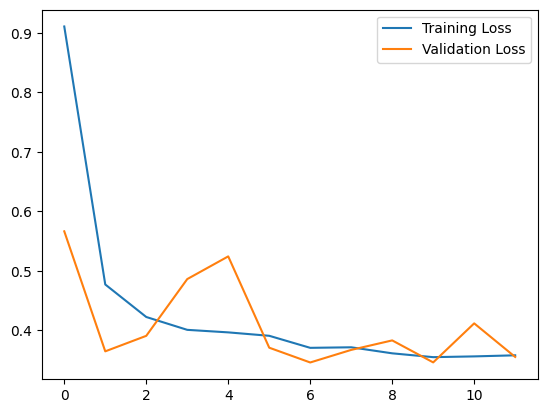

In [92]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()